In [27]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import requests



In [36]:
URL ="https://en.wikipedia.org/wiki/List_of_Arsenal_F.C._players"
res = requests.get(URL)
html_page = res.content
soup = BeautifulSoup(html_page, "lxml")
print (soup.prettify())



<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Arsenal F.C. players - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"78781a3d-3f84-420f-9699-062ee35f34bd","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Arsenal_F.C._players","wgTitle":"List of Arsenal F.C. players","wgCurRevisionId":976121009,"wgRevisionId":976121009,"wgArticleId":2398921,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use British English from July 2016"

In [37]:
print(soup.title.text)


List of Arsenal F.C. players - Wikipedia


In [38]:
for link in soup.find_all("a"):
    print("Inner Text: {}".format(link.text))
    print("Title: {}".format(link.get("title")))
    print("href: {}".format(link.get("href")))

Inner Text: 
Title: None
href: None
Inner Text: 
Title: This is a featured list. Click here for more information.
href: /wiki/Wikipedia:Featured_lists
Inner Text: Jump to navigation
Title: None
href: #mw-head
Inner Text: Jump to search
Title: None
href: #searchInput
Inner Text: List of Arsenal F.C. players (25–99 appearances)
Title: List of Arsenal F.C. players (25–99 appearances)
href: /wiki/List_of_Arsenal_F.C._players_(25%E2%80%9399_appearances)
Inner Text: List of Arsenal F.C. players (1–24 appearances)
Title: List of Arsenal F.C. players (1–24 appearances)
href: /wiki/List_of_Arsenal_F.C._players_(1%E2%80%9324_appearances)
Inner Text: Arsenal F.C. § First-team squad
Title: Arsenal F.C.
href: /wiki/Arsenal_F.C.#First-team_squad
Inner Text: 
Title: None
href: /wiki/File:Ian_Wright_from_Lee_Dixon_interview_1.jpg
Inner Text: 
Title: Enlarge
href: /wiki/File:Ian_Wright_from_Lee_Dixon_interview_1.jpg
Inner Text: Ian Wright
Title: Ian Wright
href: /wiki/Ian_Wright
Inner Text: Arsenal Foo

In [39]:
players_table = soup.find("table", attrs={"class": "wikitable sortable plainrowheaders"})
players_table_data= players_table.tbody.find_all("tr")  # contains 2 rows
print(players_table_data)
# Get all the headings of Lists
headings = []
for th in players_table_data[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    headings.append(th.text.replace('\n', ' ').strip())

print(headings)

[<tr>
<th rowspan="2" scope="col">Player
</th>
<th rowspan="2" scope="col">Nationality
</th>
<th rowspan="2" scope="col">Pos
</th>
<th rowspan="2" scope="col">Club career
</th>
<th scope="col">Starts
</th>
<th scope="col">Subs
</th>
<th scope="col">Total
</th>
<th rowspan="2" scope="col">Goals
</th></tr>, <tr class="unsortable">
<th colspan="3" scope="col">Appearances
</th></tr>, <tr>
<th scope="row"><span data-sort-value="Crawford, Gavin"><span class="vcard"><span class="fn"><a href="/wiki/Gavin_Crawford_(footballer)" title="Gavin Crawford (footballer)">Gavin Crawford</a></span></span></span>
</th>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/10/Flag_of_Scotland.svg/23px-Flag_of_Scotland.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/10/Flag_of_Scotland.svg/35px-Flag_of_Scotland.svg.png 1.5x, //upload.wikimedia.o

In [40]:
import re
data = []
t_header= ['Nationality', 'Pos', 'Club career', 'Starts', 'Subs', 'Total', 'Goals']
names =[]
player=[]
regex= 'title="[A-Z]*.*[a-z]* .[A-Z]*.*[a-z]*"'
regex2 ='(footballer.*)'
for z in players_table:
    x = re.findall(regex, str(z))
    names=x 
    
for i in names:
    i=i.replace('title="','')
    #print (i)
    i=i.replace('"','')
    #print (i)
    i=re.sub(regex2,'',i)
    i=i.replace('(','')
    player.append(i)
#print(player)
table_data = []
for tr in players_table.tbody.find_all("tr"): # find all tr's from table's tbody
    #print(tr)
    t_row = {}
    for td, th in zip(tr.find_all("td"), t_header): 
        t_row[th] = td.text.replace('\n', '').strip()
    table_data.append(t_row)

    # Put the data for the table with his heading.

#table_data




In [41]:
df = pd.DataFrame(data=table_data)
df = df[2:]
dfplayer=pd.DataFrame(data=player, columns=['player'])
df['player'] = dfplayer['player'].values

print(df[:60])

         Nationality    Pos               Club career Starts Subs Total Goals  \
2           Scotland     RW                 1891–1898    138    0   138    18   
3            England     MF                 1893–1899    150    0   150    10   
4            England     MF                 1896–1903    153    0   153    11   
5           Scotland     MF                 1898–1912    284    0   284    13   
6           Scotland  RB/LB                 1899–1903    112    0   112     1   
7           Scotland     LB                 1899–1905    204    0   204     1   
8            England     RB                 1900–1910    149    0   149     0   
9            England     GK                 1900–1908    303    0   303     0   
10           England     RW                 1901–1905    133    0   133    34   
11           England     FW                 1901–1905    106    0   106    48   
12           England     FW                 1902–1908    196    0   196    84   
13          Scotland     MF 

In [42]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 
df

,player,Nationality,Pos,Club career,Starts,Subs,Total,Goals
2,Gavin Crawford,Scotland,RW,1891–1898,138,0,138,18
3,Fred Davis,England,MF,1893–1899,150,0,150,10
4,John Anderson,England,MF,1896–1903,153,0,153,11
5,John Dick,Scotland,MF,1898–1912,284,0,284,13
6,Duncan McNichol,Scotland,RB/LB,1899–1903,112,0,112,1
...,...,...,...,...,...,...,...,...
221,Granit Xhaka,Switzerland,MF,2016–,166,10,176,12
222,Shkodran Mustafi,Germany,CB,2016–,136,6,142,9
223,Sead Kolašinac,Bosnia and Herzegovina,LB,2017–,83,22,105,5
224,Alexandre Lacazette,France,FW,2017–,99,28,127,48


In [57]:
df.loc[df['Pos'] == 'RB/LB', 'Pos'] = 'LB'
df.loc[df['Pos'] == 'FW/MF', 'Pos'] = 'MF'
df.loc[df['Pos'] == 'CB/MF', 'Pos'] = 'CB'
df.loc[df['Pos'] == 'ST', 'Pos'] = 'FW'
df[50:100]


,player,Nationality,Pos,Club career,Starts,Subs,Total,Goals
52,Cliff Bastin,England,LW,1929–1947,396,0,396,178
53,Alex James,Scotland,MF,1929–1937,261,0,261,27
54,Leslie Compton,England,CB,1930–1950,273,0,273,6
55,George Male,England,RB,1930–1948,318,0,318,0
56,Frank Moss goalkeeper),England,GK,1931–1936,161,0,161,1
57,Ray Bowden,England,FW,1933–1937,138,0,138,48
58,Wilf Copping,England,MF,1934–1939,189,0,189,0
59,Jack Crayston,England,MF,1934–1939,187,0,187,17
60,Ted Drake,England,FW,1934–1939,184,0,184,139
61,Alf Kirchen,England,RW,1935–1939,101,0,101,45


In [80]:
df['Goals']=pd.to_numeric(df['Goals'])
df['Total']=pd.to_numeric(df['Total'])
df = df.assign(GoalsperGame=lambda x: (x['Goals'] / x['Total']))
print(df)

                        player     Nationality Pos             Club career  \
60                   Ted Drake         England  FW               1934–1939   
46               Jack Lambert          England  FW               1926–1933   
62                   Reg Lewis         England  FW               1935–1953   
225  Pierre-Emerick Aubameyang           Gabon  FW                   2018–   
157                 Ian Wright         England  FW               1991–1998   
..                         ...             ...  ..                     ...   
104                Bob Wilson         Scotland  GK               1963–1974   
219                  Petr Čech  Czech Republic  GK               2015–2019   
9               Jimmy Ashcroft         England  GK               1900–1908   
20              Hugh McDonald         Scotland  GK  19061908–19101912–1913   
58                Wilf Copping         England  MF               1934–1939   

    Starts Subs  Total  Goals  GoalsperGame  
60     184    0  

In [69]:
df=df.sort_values(by=['GoalsperGame'], ascending=False)
dfpos=df.groupby('Pos')
df


,player,Nationality,Pos,Club career,Starts,Subs,Total,Goals,GoalsperGame
60,Ted Drake,England,FW,1934–1939,184,0,184,139,0.755435
46,Jack Lambert,England,FW,1926–1933,161,0,161,109,0.677019
62,Reg Lewis,England,FW,1935–1953,176,0,176,118,0.670455
225,Pierre-Emerick Aubameyang,Gabon,FW,2018–,97,13,110,71,0.645455
157,Ian Wright,England,FW,1991–1998,279,9,288,185,0.642361
...,...,...,...,...,...,...,...,...,...
104,Bob Wilson,Scotland,GK,1963–1974,308,0,308,0,0.000000
219,Petr Čech,Czech Republic,GK,2015–2019,139,0,139,0,0.000000
9,Jimmy Ashcroft,England,GK,1900–1908,303,0,303,0,0.000000
20,Hugh McDonald,Scotland,GK,19061908–19101912–1913,103,0,103,0,0.000000


In [71]:
GK = dfpos.get_group("GK")
CB =  dfpos.get_group("CB")
MF=dfpos.get_group("MF")
FW =dfpos.get_group("FW")
LB=dfpos.get_group("LB")
LW=dfpos.get_group("LW")
RB=dfpos.get_group("RB")
RW=dfpos.get_group("RW")

GK =GK.drop(columns=['Subs', 'Club career'])
CB =CB.drop(columns=['Subs', 'Club career'])
MF=MF.drop(columns=['Subs', 'Club career'])
FW =FW.drop(columns=['Subs', 'Club career'])
LB=LB.drop(columns=['Subs', 'Club career'])
LW=LW.drop(columns=['Subs', 'Club career'])
RB=RB.drop(columns=['Subs', 'Club career'])
RW=RW.drop(columns=['Subs', 'Club career'])



In [72]:
GK

,player,Nationality,Pos,Starts,Total,Goals,GoalsperGame
56,Frank Moss goalkeeper),England,GK,161,161,1,0.006211
43,Dan Lewis,Wales,GK,167,167,0,0.000000
182,Manuel Almunia,Spain,GK,173,175,0,0.000000
101,Jim Furnell,England,GK,167,167,0,0.000000
38,Jock Robson,Scotland,GK,101,101,0,0.000000
178,Jens Lehmann,Germany,GK,199,200,0,0.000000
34,Ernest Williamson,England,GK,113,113,0,0.000000
119,Jimmy Rimmer,England,GK,146,146,0,0.000000
75,Jack Kelsey,Wales,GK,352,352,0,0.000000
156,David Seaman,England,GK,564,564,0,0.000000


In [73]:
CB

,player,Nationality,Pos,Starts,Total,Goals,GoalsperGame
192,William Gallas,France,CB,142,142,17,0.119718
26,Alex Graham,Scotland,CB,179,179,20,0.111732
204,Thomas Vermaelen,Belgium,CB,136,150,15,0.100000
127,Willie Young,Scotland,CB,236,237,19,0.080169
105,Frank McLintock,Scotland,CB,401,403,32,0.079404
206,Laurent Koscielny,France,CB,342,353,27,0.076487
135,Tony Adams,England,CB,663,669,48,0.071749
133,Chris Whyte,England,CB,108,113,8,0.070796
222,Shkodran Mustafi,Germany,CB,136,142,9,0.063380
149,Steve Bould,England,CB,348,372,22,0.059140


In [74]:
MF

,player,Nationality,Pos,Starts,Total,Goals,GoalsperGame
50,David Jack,England,MF,208,208,124,0.596154
84,Derek Tapscott,Wales,MF,132,132,68,0.515152
116,Alan Ball,England,MF,217,217,52,0.239631
65,Jimmy Logie,Scotland,MF,328,328,76,0.231707
74,Peter Goring,England,MF,240,240,53,0.220833
...,...,...,...,...,...,...,...
67,Joe Mercer,England,MF,275,275,2,0.007273
158,John Jensen,Denmark,MF,130,138,1,0.007246
202,Francis Coquelin,France,MF,115,160,0,0.000000
13,Roddy McEachrane,Scotland,MF,346,346,0,0.000000


In [75]:
FW

,player,Nationality,Pos,Starts,Total,Goals,GoalsperGame
60,Ted Drake,England,FW,184,184,139,0.755435
46,Jack Lambert,England,FW,161,161,109,0.677019
62,Reg Lewis,England,FW,176,176,118,0.670455
225,Pierre-Emerick Aubameyang,Gabon,FW,97,110,71,0.645455
157,Ian Wright,England,FW,279,288,185,0.642361
99,Joe Baker,England,FW,156,156,100,0.641026
168,Thierry Henry,France,FW,337,377,228,0.604775
41,Jimmy Brain,England,FW,232,232,139,0.599138
87,David Herd,Scotland,FW,180,180,107,0.594444
95,Geoff Strong,England,FW,137,137,77,0.562044


In [76]:
LB

,player,Nationality,Pos,Starts,Total,Goals,GoalsperGame
29,Frank Bradshaw,England,LB,142,142,14,0.098592
78,Dennis Evans,England,LB,207,207,12,0.057971
223,Sead Kolašinac,Bosnia and Herzegovina,LB,83,105,5,0.047619
19,Jimmy Sharp,Scotland,LB,116,116,5,0.043103
212,Nacho Monreal,Spain,LB,223,251,10,0.039841
167,Ashley Cole,England,LB,218,228,9,0.039474
115,Sammy Nelson,Northern Ireland,LB,325,339,12,0.035398
198,Kieran Gibbs,England,LB,183,230,6,0.026087
152,Nigel Winterburn,England,LB,572,584,12,0.020548
90,Billy McCullough,Northern Ireland,LB,268,268,5,0.018657


In [77]:
LW

,player,Nationality,Pos,Starts,Total,Goals,GoalsperGame
52,Cliff Bastin,England,LW,396,396,178,0.449495
172,Robert Pires,France,LW,238,284,84,0.295775
164,Marc Overmars,Netherlands,LW,127,142,41,0.288732
141,Martin Hayes,England,LW,92,132,34,0.257576
83,Joe Haverty,Ireland,LW,122,122,26,0.213115
16,David Neave,Scotland,LW,168,168,32,0.190476
154,Anders Limpar,Sweden,LW,96,116,20,0.172414
42,Sidney Hoar,England,LW,117,117,18,0.153846
125,Graham Rix,England,LW,447,464,51,0.109914
33,Joe Toner,Ireland,LW,100,100,6,0.060000


In [78]:
RB

,player,Nationality,Pos,Starts,Total,Goals,GoalsperGame
138,Viv Anderson,England,RB,150,150,15,0.100000
47,Tom Parker,England,RB,294,294,17,0.057823
187,Emmanuel Eboué,Ivory Coast,RB,159,214,10,0.046729
151,Lee Dixon,England,RB,598,618,28,0.045307
64,Walley Barnes,Wales,RB,294,294,12,0.040816
216,Calum Chambers,England,RB,73,101,4,0.039604
214,Héctor Bellerín,Spain,RB,189,205,8,0.039024
173,Lauren,Cameroon,RB,227,241,9,0.037344
108,Peter Storey,England,RB,494,501,17,0.033932
85,Stan Charlton,England,RB,110,110,3,0.027273


In [79]:
RW

,player,Nationality,Pos,Starts,Total,Goals,GoalsperGame
61,Alf Kirchen,England,RW,101,101,45,0.445545
94,Alan Skirton,England,RW,153,154,54,0.350649
45,Joe Hulme,England,RW,374,374,125,0.334225
193,Theo Walcott,England,RW,252,397,108,0.272040
10,Tommy Briercliffe,England,RW,133,133,34,0.255639
97,Johnny MacLeod,Scotland,RW,112,112,28,0.250000
166,Freddie Ljungberg,Sweden,RW,285,328,72,0.219512
144,Perry Groves,England,RW,120,203,28,0.137931
2,Gavin Crawford,Scotland,RW,138,138,18,0.130435
66,Ian McPherson,Scotland,RW,163,163,21,0.128834


In [87]:
dfnew=df.query('Pos != "GK" & Pos != "CB" & Pos != "LB" & Pos != "RB"')
dfnew

,player,Nationality,Pos,Club career,Starts,Subs,Total,Goals,GoalsperGame
60,Ted Drake,England,FW,1934–1939,184,0,184,139,0.755435
46,Jack Lambert,England,FW,1926–1933,161,0,161,109,0.677019
62,Reg Lewis,England,FW,1935–1953,176,0,176,118,0.670455
225,Pierre-Emerick Aubameyang,Gabon,FW,2018–,97,13,110,71,0.645455
157,Ian Wright,England,FW,1991–1998,279,9,288,185,0.642361
...,...,...,...,...,...,...,...,...,...
67,Joe Mercer,England,MF,1946–1954,275,0,275,2,0.007273
158,John Jensen,Denmark,MF,1992–1996,130,8,138,1,0.007246
202,Francis Coquelin,France,MF,2008–2018,115,45,160,0,0.000000
13,Roddy McEachrane,Scotland,MF,1902–1915,346,0,346,0,0.000000


In [94]:
dff = df.groupby('Nationality', as_index=False)['GoalsperGame'].mean()
dff = dff.sort_values(by=['GoalsperGame'], ascending=False)
print('Mean of goal scoring per match for every country ')
dff



Mean of goal scoring per match for every country 


,Nationality,GoalsperGame
10,Gabon,0.645455
5,Chile,0.481928
23,Togo,0.436620
14,Netherlands,0.349080
18,Russia,0.215278
21,Sweden,0.195963
8,England,0.175540
9,France,0.173595
15,Nigeria,0.161447
7,Denmark,0.141050


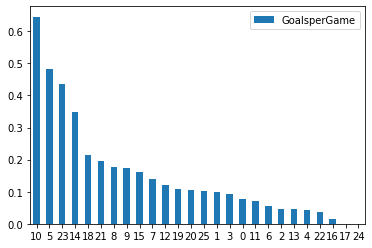

In [100]:
ax = dff.plot.bar(rot=0)
ax

In [121]:
new = dfnew
new=new[new['Club career'].str.match('^2')== True]
print("players of this century")
new



players of this century


,player,Nationality,Pos,Club career,Starts,Subs,Total,Goals,GoalsperGame
225,Pierre-Emerick Aubameyang,Gabon,FW,2018–,97,13,110,71,0.645455
215,Alexis Sánchez,Chile,FW,2014–2018,153,13,166,80,0.481928
184,Robin van Persie,Netherlands,FW,2004–2012,211,67,278,132,0.474820
191,Emmanuel Adebayor,Togo,FW,2006–2009,114,28,142,62,0.436620
210,Olivier Giroud,France,FW,2012–2018,169,84,253,105,0.415020
224,Alexandre Lacazette,France,FW,2017–,99,28,127,48,0.377953
172,Robert Pires,France,LW,2000–2006,238,46,284,84,0.295775
171,Sylvain Wiltord,France,FW,2000–2004,124,51,176,49,0.278409
189,Nicklas Bendtner,Denmark,FW,2005–2014,83,88,171,47,0.274854
193,Theo Walcott,England,RW,2006–2018,252,145,397,108,0.272040


mean of goals per player per game =  0.2030303610645396


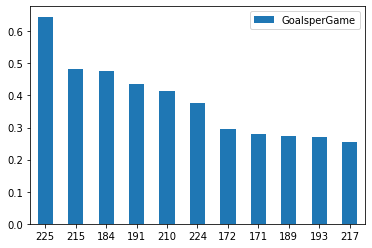

In [122]:
meanofgoals=new["GoalsperGame"].mean()
new = new[:11]
ax1 = new.plot.bar(y="GoalsperGame",rot=0)
print ("mean of goals per player per game = ",meanofgoals)
ax1

In [123]:
new2 = dfnew
new2=new2[new2['Club career'].str.match('^1')== True]
print("players of last century")
new2

players of last century


,player,Nationality,Pos,Club career,Starts,Subs,Total,Goals,GoalsperGame
60,Ted Drake,England,FW,1934–1939,184,0,184,139,0.755435
46,Jack Lambert,England,FW,1926–1933,161,0,161,109,0.677019
62,Reg Lewis,England,FW,1935–1953,176,0,176,118,0.670455
157,Ian Wright,England,FW,1991–1998,279,9,288,185,0.642361
99,Joe Baker,England,FW,1962–1966,156,0,156,100,0.641026
...,...,...,...,...,...,...,...,...,...
69,Archie Macaulay,Scotland,MF,1947–1950,108,0,108,1,0.009259
67,Joe Mercer,England,MF,1946–1954,275,0,275,2,0.007273
158,John Jensen,Denmark,MF,1992–1996,130,8,138,1,0.007246
13,Roddy McEachrane,Scotland,MF,1902–1915,346,0,346,0,0.000000


mean of goals per player per game =  0.2373251654649621


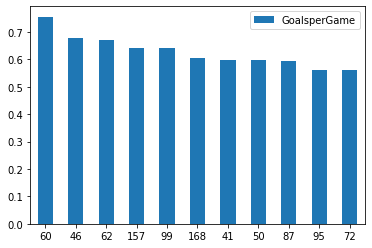

In [124]:
meanofgoals2=new2["GoalsperGame"].mean()
new2 = new2[:11]
ax2 = new2.plot.bar(y="GoalsperGame",rot=0)
print ("mean of goals per player per game = ",meanofgoals2)
ax2